<a href="https://colab.research.google.com/github/sumanth-rachamalla/Spark-Foundation-Internship/blob/main/Unsupervised_ML_Task2_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Graduate Rotational Internship Program(GRIP): The Sparks Foundation**

## **Data Science & Business Analytics Intern**

## **Author - Sumanth Rachamalla**

## **Task-2 Prediction using Unsupervised ML**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

##**Importing required libraries.**

In [ ]:
#Importing the libearies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

# **Exploratory Data Analysis**

## **Load the dataset**

In [ ]:

iris = datasets.load_iris()
print("Dataset loaded successfully")



Dataset loaded successfully


## **Reading Dataset**

In [ ]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)

#Top values of Dataset
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

#Bottom Values of Dataset
Data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
#shape of data
Data.shape


(150, 4)

In [ ]:
#properties
Data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Data Visualization**

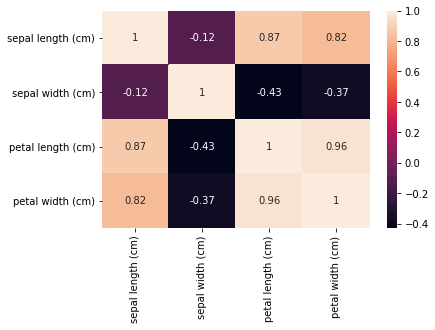

In [ ]:
sns.heatmap(Data.corr(), annot = True, linecolor='black')


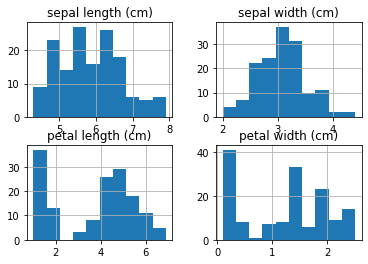

In [ ]:
Data.hist()
plt.show()

# **Finding optimum numbers of Clusters for Kmeans**

In [ ]:
# Settin the data
x=Data.iloc[:,0:4].values

css=[]

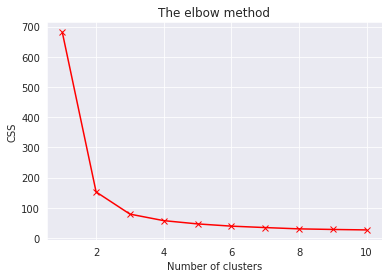

In [ ]:
# Finding inertia on various k values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)
sns.set_style('darkgrid')
   
plt.plot(range(1, 11), css,'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

From one can clearly see that according to the elbow method most accurate value for number of cluseter is 3.



# **Applying K-means classifier**

In [ ]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [ ]:
kmeans.cluster_centers_


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

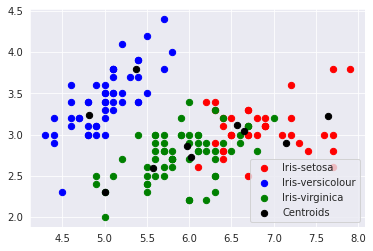

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 40, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 40, c = 'black', label = 'Centroids')

plt.legend()

### **THANKYOU**